In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# parameter Initialization
batch_size = 8
epochs = 100
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.4,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [9]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
train_data_gen[0][0].shape

(8, 256, 256, 3)

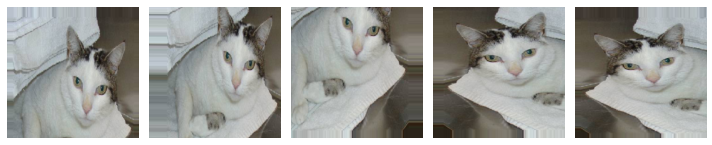

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [13]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


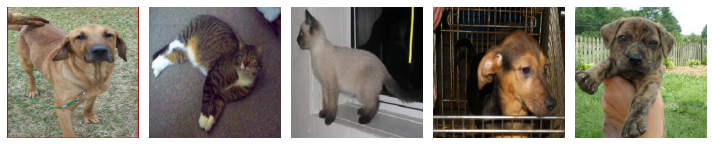

In [14]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [15]:
_[:5] # 정답 데이터

array([1., 0., 0., 1., 1.], dtype=float32)

In [16]:
# 모델
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))


x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)



x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(512, (3, 3), strides=1,  padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1,  padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)


x=tf.keras.layers.Conv2D(512, (3, 3), strides=1,  padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584

In [17]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.00001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [18]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/100
250/250 [==============================] - 65s 231ms/step - loss: 1.0206 - binary_accuracy: 0.5560 - val_loss: 0.9477 - val_binary_accuracy: 0.5000
Epoch 2/100
250/250 [==============================] - 57s 228ms/step - loss: 0.9029 - binary_accuracy: 0.5805 - val_loss: 0.7343 - val_binary_accuracy: 0.5790
Epoch 3/100
250/250 [==============================] - 57s 229ms/step - loss: 0.8387 - binary_accuracy: 0.6150 - val_loss: 0.6090 - val_binary_accuracy: 0.6660
Epoch 4/100
250/250 [==============================] - 57s 228ms/step - loss: 0.8210 - binary_accuracy: 0.6230 - val_loss: 0.5893 - val_binary_accuracy: 0.6800
Epoch 5/100
250/250 [==============================] - 57s 229ms/step - loss: 0.7727 - binary_accuracy: 0.6200 - val_loss: 0.6192 - val_binary_accuracy: 0.6700
Epoch 6/100
250/250 [==============================] - 57s 229ms/step - loss: 0.7139 - binary_accuracy: 0.6545 - val_loss: 0.5856 - val_binary_accuracy: 0.6970
Epoch 7/100
250/250 [===================

In [19]:
#learning rate = 0.001
# optimazier = RMSprop
# batch_size = 16
# epochs = 100
# x=tf.keras.layers.Dense(2048, activation='relu')(x)
# x=tf.keras.layers.Dense(1024, activation='relu')(x)
# 트레인은 정확도 82% 정도까지 상승, validation은 55~80 사이를 큰폭으로 왔다갔다.. 

In [20]:
#2회
#learning rate = 0.0005
# optimazier = RMSprop
# batch_size = 32
# epochs = 20
# x=tf.keras.layers.BatchNormalization()(x) 위치 변경
# 65~70 % 정도? val은 엄청 왔다갔다함.. 오히려 성능이 구려진 느낌이다..

In [21]:
#3회
# x = tf.keras.layers.Dropout(0.5)(x) 추가
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Activation("relu")(x) 방식으로 적용\
# 과대적합은 아니나 오히려 평균은 줄은 느낌? 근데... 괜찮은거 같기도? 에폭을 늘려보자.

In [22]:
#4회
#에폭 100으로 증가
#(learning_rate=0.0007)
#에폭 15가 지나도 50 밑으로 정신을 못차리길래.. 일단 취소.. 다시 러닝레이트 올려봐야할듯..

In [23]:
#5회
#에폭 200으로 증가 (자려구..)
#러닝레이트 0.0003

In [24]:
#6회 : 성능 좋음 계속 향상중. 에폭을 늘릴 필요가 있겠다.. 52%~ 67% val
# 2회로 원상복구
# learning rate = 0.0003
# 에폭 30

In [25]:
# 7회 
# x=tf.keras.layers.BatchNormalization()(x) 뒤로
# RMSprop(learning_rate=0.0001)
# batch_size = 32
# epochs = 30

In [26]:
# 8회 70~80% 15 이후로 과대적합 되는 경향? 
# 댄스 1024, 512로 수정

In [27]:
# 9회 
# (learning_rate=0.00001
# 에폭 60으로.

In [28]:
# 10회 (만족)
#드랍아웃 설정

In [29]:
#11회
#드랍아웃 삭제
# Training data generator

#변경전값
# image_gen_train = ImageDataGenerator(rescale=1./255,
#                                      rotation_range=0.3,
#                                      width_shift_range=0.1,
#                                      height_shift_range=0.1,
#                                      zoom_range=0.2,
#                                      horizontal_flip=True, 
#                                      vertical_flip=False)

#변경
# image_gen_train = ImageDataGenerator(rescale=1./255,
#                                      rotation_range=0.4,
#                                      width_shift_range=0.2,
#                                      height_shift_range=0.2,
#                                      zoom_range=0.3,
#                                      horizontal_flip=True, 
#                                      vertical_flip=False)

In [30]:
#16 배치사이즈 (만족)

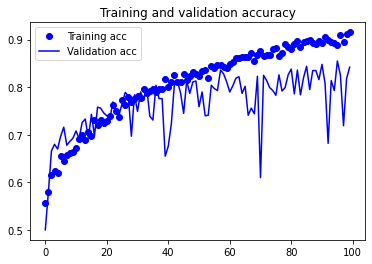

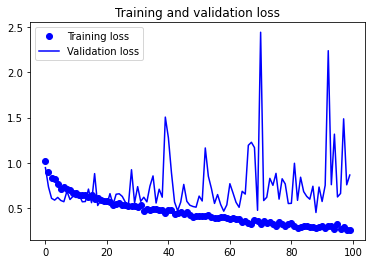

In [31]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# # 17 드랍아웃 추가 60~80% 성능. 30 넘어가면 과대적합..
# batch_size = 8
# epochs = 100

# 회고

회고

초반에 학습 자체가 안되서 생쇼를 많이 했다. 핵심 문제는 learning rate였다. learning rate가 너무 높아서 학습이 안되고 튕겨나갔던 것 같다. 가장 안정적으로 만족스러웠던 모델은


에포크 60(10 넘어가면 슬슬 과적합)
배치사이즈 16,
드랍아웃 없음,
 image_gen_train = ImageDataGenerator(rescale=1./255,
                                      rotation_range=0.4,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.3,
                                      horizontal_flip=True, 
                                      vertical_flip=False)
                                      
RMSprop(learning_rate=0.00001)
conv2D - 배치노멀라이제이션 - 맥스풀링


으로 구성된 구조였다. 

-----------

배치사이즈의 경우 크다고 성능이 잘 나오는 건 아닌 것 같다.
64는 오류가 나서 돌려보질 못했으나,
배치 32보다 16인 경우가 오히려 성능이 나았던 경우도 있다.
배치가 클수록 오버피팅 되는 경우가 더 많다고 한다. 
그래서 배치를 8로 줄여보기도 했는데.. 오버피팅이 안되는 것은 또 아닌 거 같다

------------

x=tf.keras.layers.BatchNormalization()(x)
의 경우 conv와 액티베이션 사이에 놓이는 것을 추천하더라. 그러나 현재 액티베이션이 결합되어있어서 (conv 액티베이션) 앞에도 놔보고 뒤에도 놔봤는데, 약간의 성능차이는 있는지 모르겠으나.. 비슷한거 같다. 다만 모든 경우에 배치를 적용해주는 것이 성능이 좋았다. 



----------

무엇보다...... 찾아가는 과정이 재밌었다.. (학습이 시작된 이후부터 ㅋㅋ)


In [33]:
# !pip3 install tensorflow-estimator==2.6.0

In [34]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [35]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [36]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [37]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [38]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmpkmwwbz4d.jpg.


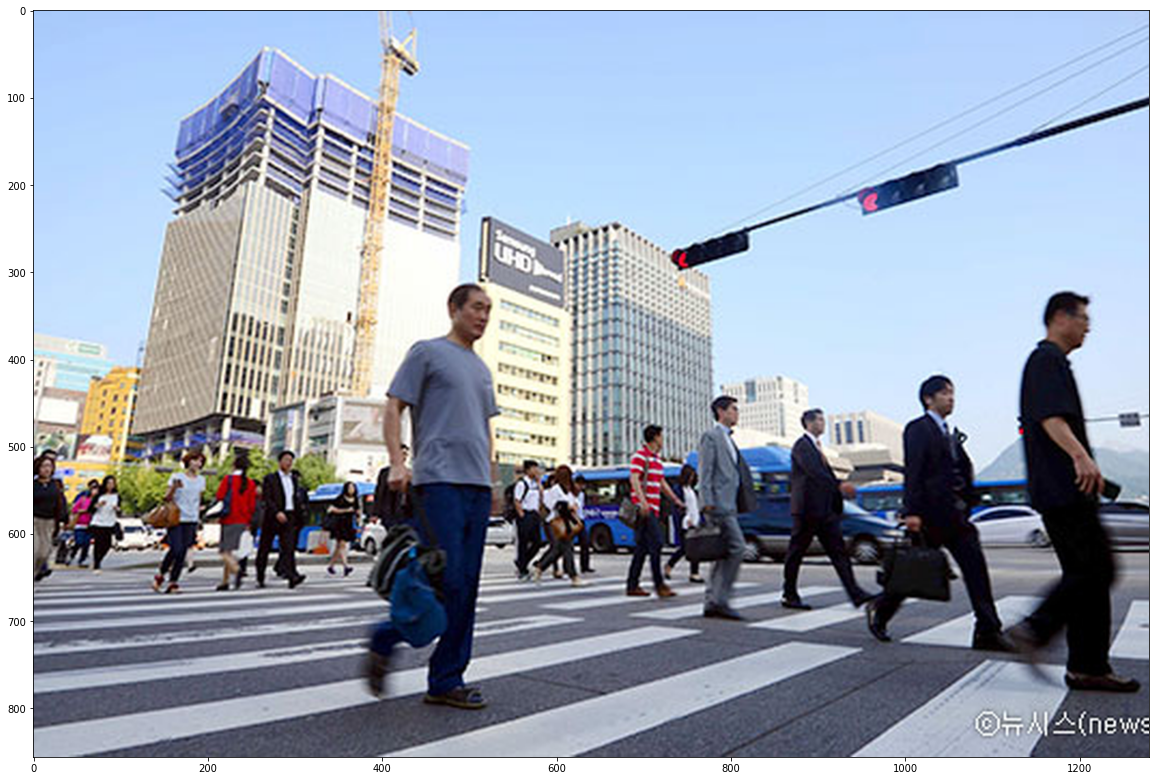

In [39]:
image_url = "https://mediahub.seoul.go.kr/wp-content/uploads/2016/06/4ff235248c9e8c458dec3c0c42b29146.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [40]:
# module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [41]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [44]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  5.51344108581543


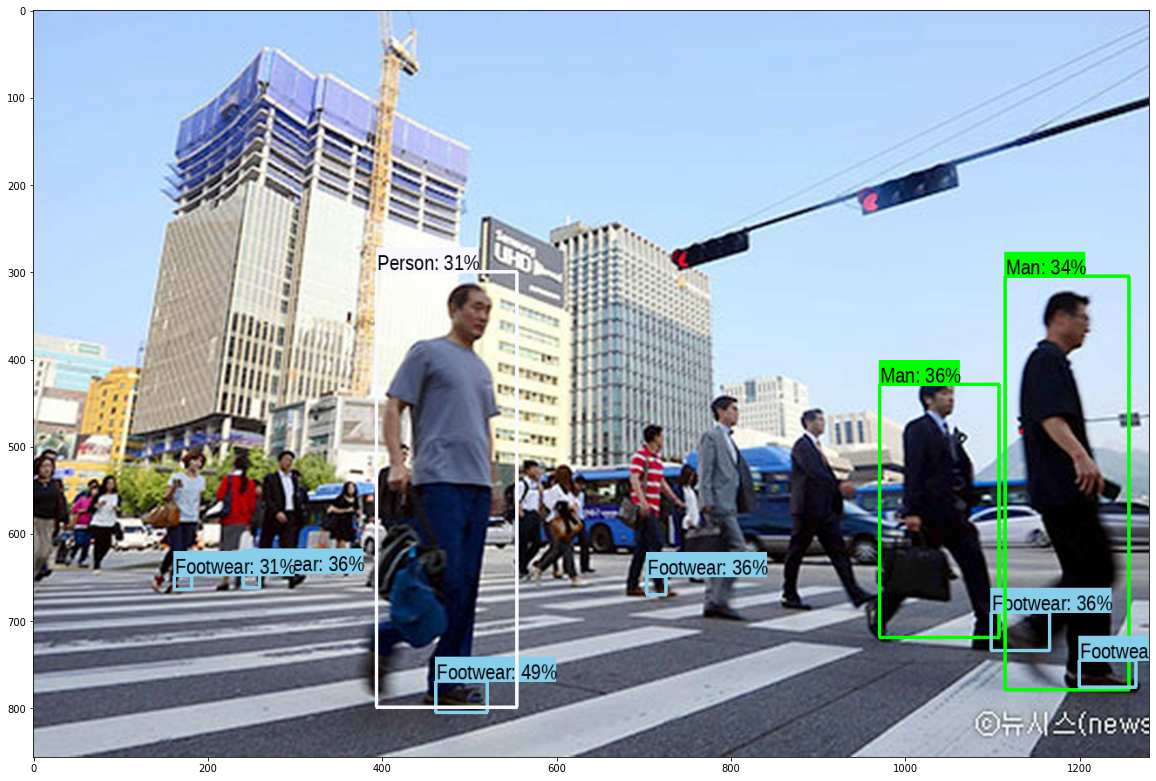

In [45]:
run_detector(detector, downloaded_image_path)

ln32에 회고작성